In [2]:
import itertools

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfTransformer,
    TfidfVectorizer,
)
from sklearn.metrics.pairwise import cosine_similarity

import sourmash

## Read in data

In [3]:
testdata = "../testdata"

In [4]:
def make_hashval_series(sigfile):
    sig = sourmash.load_one_signature(sigfile)
    print(f"sig.minhash.track_abundance: {sig.minhash.track_abundance}")
    hashes = pd.Series(sig.minhash.get_mins(with_abundance=True), name=sig.name)
    return hashes


kmers_2 = make_hashval_series(f"{testdata}/2.fa.sig.gz")
kmers_2

sig.minhash.track_abundance: False


/tmp/ipykernel_7464/646302664.py:2: DeprecatedWarning: load_one_signature is deprecated as of 4.8.9 and will be removed in 5.0. Use load_file_as_signatures instead.
  sig = sourmash.load_one_signature(sigfile)
/tmp/ipykernel_7464/646302664.py:4: DeprecatedWarning: get_mins is deprecated as of 3.5 and will be removed in 5.0. Use .hashes property instead.
  hashes = pd.Series(sig.minhash.get_mins(with_abundance=True), name=sig.name)


10798666575355       1
11108262945072       1
17191644621368       1
17302105753387       1
30946781515590       1
                    ..
18424308230534323    1
18425171082440467    1
18428501249114229    1
18433230873697864    1
18438187128864941    1
Name: CP001071.1 Akkermansia muciniphila ATCC BAA-835, complete genome, Length: 2701, dtype: int64

In [5]:
kmers_47 = make_hashval_series(f"{testdata}/47.fa.sig.gz")
kmers_47

sig.minhash.track_abundance: False


/tmp/ipykernel_7464/646302664.py:2: DeprecatedWarning: load_one_signature is deprecated as of 4.8.9 and will be removed in 5.0. Use load_file_as_signatures instead.
  sig = sourmash.load_one_signature(sigfile)
/tmp/ipykernel_7464/646302664.py:4: DeprecatedWarning: get_mins is deprecated as of 3.5 and will be removed in 5.0. Use .hashes property instead.
  hashes = pd.Series(sig.minhash.get_mins(with_abundance=True), name=sig.name)


2925290528259        1
7397951382043        1
9478766578752        1
26390034908046       1
31811219567311       1
                    ..
18438159643459969    1
18440518503779835    1
18441289041766013    1
18444487060015322    1
18444666364288446    1
Name: NC_009661.1 Shewanella baltica OS185 plasmid pS18501, complete sequence, Length: 5177, dtype: int64

In [6]:
kmers_63 = make_hashval_series(f"{testdata}/63.fa.sig.gz")
kmers_63

sig.minhash.track_abundance: False


/tmp/ipykernel_7464/646302664.py:2: DeprecatedWarning: load_one_signature is deprecated as of 4.8.9 and will be removed in 5.0. Use load_file_as_signatures instead.
  sig = sourmash.load_one_signature(sigfile)
/tmp/ipykernel_7464/646302664.py:4: DeprecatedWarning: get_mins is deprecated as of 3.5 and will be removed in 5.0. Use .hashes property instead.
  hashes = pd.Series(sig.minhash.get_mins(with_abundance=True), name=sig.name)


2925290528259        1
4550472317399        1
7397951382043        1
13950946236093       1
18944997319943       1
                    ..
18435861506577465    1
18437428333588590    1
18438159643459969    1
18444487060015322    1
18444666364288446    1
Name: NC_011665.1 Shewanella baltica OS223 plasmid pS22303, complete sequence, Length: 5238, dtype: int64

In [7]:
kmers_63.value_counts()

NC_011665.1 Shewanella baltica OS223 plasmid pS22303, complete sequence
1    5238
Name: count, dtype: int64

In [8]:
kmers_47.value_counts()

NC_009661.1 Shewanella baltica OS185 plasmid pS18501, complete sequence
1    5177
Name: count, dtype: int64

In [9]:
kmers_2.value_counts()

CP001071.1 Akkermansia muciniphila ATCC BAA-835, complete genome
1    2701
Name: count, dtype: int64

In [10]:
corpus = [
    " ".join(map(str, kmers_2.index)),
    " ".join(map(str, kmers_47.index)),
    " ".join(map(str, kmers_63.index)),
]

In [11]:
sample_names = [
    # 2.fa.sig.gz
    "CP001071.1",
    # 47.fa.sig.gz
    "NC_009661.1",
    # 63.fa.sig.gz
    "NC_011665.1",
]

In [12]:
count_vectorizer = CountVectorizer()
X_counts = count_vectorizer.fit_transform(corpus)
X_counts

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 13116 stored elements and shape (3, 10587)>

In [13]:
query_counts = pd.DataFrame(
    X_counts.todense(),
    columns=count_vectorizer.get_feature_names_out(),
    index=sample_names,
).T
query_counts

,CP001071.1,NC_009661.1,NC_011665.1
10000031604968879,0,1,1
10001967542883816,0,0,1
10002844747369936,0,1,0
10003635611094380,1,0,0
10004355354687945,0,0,1
...,...,...,...
9994065414699288,0,0,1
9994394125866496,0,1,1
9994816441327197,1,0,0
9997181429474537,0,0,1


In [14]:
query_frequencies = query_counts / query_counts.sum()
query_frequencies

,CP001071.1,NC_009661.1,NC_011665.1
10000031604968879,0.00000,0.000193,0.000191
10001967542883816,0.00000,0.000000,0.000191
10002844747369936,0.00000,0.000193,0.000000
10003635611094380,0.00037,0.000000,0.000000
10004355354687945,0.00000,0.000000,0.000191
...,...,...,...
9994065414699288,0.00000,0.000000,0.000191
9994394125866496,0.00000,0.000193,0.000191
9994816441327197,0.00037,0.000000,0.000000
9997181429474537,0.00000,0.000000,0.000191


In [15]:
query_frequencies.value_counts()

CP001071.1  NC_009661.1  NC_011665.1
0.00000     0.000000     0.000191       2709
0.00037     0.000000     0.000000       2701
0.00000     0.000193     0.000000       2648
                         0.000191       2529
Name: count, dtype: int64

In [16]:
query_counts.sum()

CP001071.1     2701
NC_009661.1    5177
NC_011665.1    5238
dtype: int64

In [17]:
against_counts = query_counts.sum(axis=1)
against_counts

10000031604968879    2
10001967542883816    1
10002844747369936    1
10003635611094380    1
10004355354687945    1
                    ..
9994065414699288     1
9994394125866496     2
9994816441327197     1
9997181429474537     1
9999648366321789     2
Length: 10587, dtype: int64

In [18]:
against_counts.value_counts()

1    8058
2    2529
Name: count, dtype: int64

In [19]:
8058 + 2529

10587

In [20]:
against_counts_binary = (against_counts > 0).astype(int)
against_counts_binary

10000031604968879    1
10001967542883816    1
10002844747369936    1
10003635611094380    1
10004355354687945    1
                    ..
9994065414699288     1
9994394125866496     1
9994816441327197     1
9997181429474537     1
9999648366321789     1
Length: 10587, dtype: int64

In [21]:
against_counts_binary.value_counts()

1    10587
Name: count, dtype: int64

In [22]:
against_counts.sum()

np.int64(13116)

In [23]:
against_frequencies = against_counts_binary / against_counts_binary.sum()
against_frequencies

10000031604968879    0.000094
10001967542883816    0.000094
10002844747369936    0.000094
10003635611094380    0.000094
10004355354687945    0.000094
                       ...   
9994065414699288     0.000094
9994394125866496     0.000094
9994816441327197     0.000094
9997181429474537     0.000094
9999648366321789     0.000094
Length: 10587, dtype: float64

In [24]:
against_frequencies.value_counts()

0.000094    10587
Name: count, dtype: int64

## Compute Probability of Overlap for all comparisons

In [25]:
comparisons = list(itertools.product(sample_names, repeat=2))
comparisons

[('CP001071.1', 'CP001071.1'),
 ('CP001071.1', 'NC_009661.1'),
 ('CP001071.1', 'NC_011665.1'),
 ('NC_009661.1', 'CP001071.1'),
 ('NC_009661.1', 'NC_009661.1'),
 ('NC_009661.1', 'NC_011665.1'),
 ('NC_011665.1', 'CP001071.1'),
 ('NC_011665.1', 'NC_009661.1'),
 ('NC_011665.1', 'NC_011665.1')]

In [26]:
def get_sample_hashes(df, sample):
    return df.index[df[sample] > 0]


n_comparisons = 9

print(f"sample1\t\tsample2\t\tprob_overlap\tprob_overlap_adjusted")

for sample1, sample2 in comparisons:
    hashes1 = get_sample_hashes(query_counts, sample1)
    hashes2 = get_sample_hashes(query_counts, sample2)

    prob1 = against_frequencies[hashes1]
    prob2 = against_frequencies[hashes2]

    prob_overlap = (prob1 * prob2).sum()
    prob_overlap_adjusted = n_comparisons * prob_overlap
    print(f"{sample1}\t{sample2}\t{prob_overlap:.2e}\t{prob_overlap_adjusted:.8f}")

sample1		sample2		prob_overlap	prob_overlap_adjusted
CP001071.1	CP001071.1	2.41e-05	0.00021688
CP001071.1	NC_009661.1	0.00e+00	0.00000000
CP001071.1	NC_011665.1	0.00e+00	0.00000000
NC_009661.1	CP001071.1	0.00e+00	0.00000000
NC_009661.1	NC_009661.1	4.62e-05	0.00041570
NC_009661.1	NC_011665.1	2.26e-05	0.00020307
NC_011665.1	CP001071.1	0.00e+00	0.00000000
NC_011665.1	NC_009661.1	2.26e-05	0.00020307
NC_011665.1	NC_011665.1	4.67e-05	0.00042059


# TF-IDF

In [27]:
vectorizer = TfidfVectorizer(norm=None, smooth_idf=False, binary=True)
X = vectorizer.fit_transform(corpus)

In [28]:
vectorizer.get_feature_names_out()

array(['10000031604968879', '10001967542883816', '10002844747369936', ...,
       '9994816441327197', '9997181429474537', '9999648366321789'],
      dtype=object)

In [29]:
vectorizer.get_feature_names_out().shape

(10587,)

In [30]:
vectorizer.idf_

array([1.40546511, 2.09861229, 2.09861229, ..., 2.09861229, 2.09861229,
       1.40546511])

In [31]:
idf_sklearn = pd.Series(
    vectorizer.idf_, index=vectorizer.get_feature_names_out(), name="idf_sklearn"
)
idf_sklearn

10000031604968879    1.405465
10001967542883816    2.098612
10002844747369936    2.098612
10003635611094380    2.098612
10004355354687945    2.098612
                       ...   
9994065414699288     2.098612
9994394125866496     1.405465
9994816441327197     2.098612
9997181429474537     2.098612
9999648366321789     1.405465
Name: idf_sklearn, Length: 10587, dtype: float64

In [32]:
tf_idf = pd.DataFrame(
    X.todense(), columns=vectorizer.get_feature_names_out(), index=sample_names
)
tf_idf

,10000031604968879,10001967542883816,10002844747369936,10003635611094380,10004355354687945,10004720045874964,10004753411179897,10004925495910091,10008184940193864,10008461597296659,...,998926194132937,9989307766906661,9990139941134371,9992012151567792,9992489863586669,9994065414699288,9994394125866496,9994816441327197,9997181429474537,9999648366321789
CP001071.1,0.000000,0.000000,0.000000,2.098612,0.000000,2.098612,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.098612,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000,0.000000
NC_009661.1,1.405465,0.000000,2.098612,0.000000,0.000000,0.000000,0.000000,1.405465,1.405465,2.098612,...,1.405465,1.405465,0.000000,0.000000,1.405465,0.000000,1.405465,0.000000,0.000000,1.405465
NC_011665.1,1.405465,2.098612,0.000000,0.000000,2.098612,0.000000,2.098612,1.405465,1.405465,0.000000,...,1.405465,1.405465,0.000000,2.098612,1.405465,2.098612,1.405465,0.000000,2.098612,1.405465


## Manually compute IDF to see if it matches

In [33]:
document_frequency = query_counts[query_counts > 0].sum(axis=1)
document_frequency

10000031604968879    2.0
10001967542883816    1.0
10002844747369936    1.0
10003635611094380    1.0
10004355354687945    1.0
                    ... 
9994065414699288     1.0
9994394125866496     2.0
9994816441327197     1.0
9997181429474537     1.0
9999648366321789     2.0
Length: 10587, dtype: float64

In [34]:
document_frequency.value_counts()

1.0    8058
2.0    2529
Name: count, dtype: int64

Scikit-learn adds 1 to TF-iDF so that words that appear in all documents aren't totally ignored

https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer


> The formula that is used to compute the tf-idf for a term t of a document d in a document set is tf-idf(t, d) = tf(t, d) * idf(t), and the idf is computed as idf(t) = log [ n / df(t) ] + 1 (if smooth_idf=False), where n is the total number of documents in the document set and df(t) is the document frequency of t; the document frequency is the number of documents in the document set that contain the term t. The effect of adding “1” to the idf in the equation above is that terms with zero idf, i.e., terms that occur in all documents in a training set, will not be entirely ignored. (Note that the idf formula above differs from the standard textbook notation that defines the idf as idf(t) = log [ n / (df(t) + 1) ]).

In [35]:
idf = np.log(len(sample_names) / document_frequency)
idf.name = "idf_manual"
idf

10000031604968879    0.405465
10001967542883816    1.098612
10002844747369936    1.098612
10003635611094380    1.098612
10004355354687945    1.098612
                       ...   
9994065414699288     1.098612
9994394125866496     0.405465
9994816441327197     1.098612
9997181429474537     1.098612
9999648366321789     0.405465
Name: idf_manual, Length: 10587, dtype: float64

In [36]:
idf_plus1 = idf + 1

In [37]:
(idf_plus1 == idf_sklearn).all()

np.True_

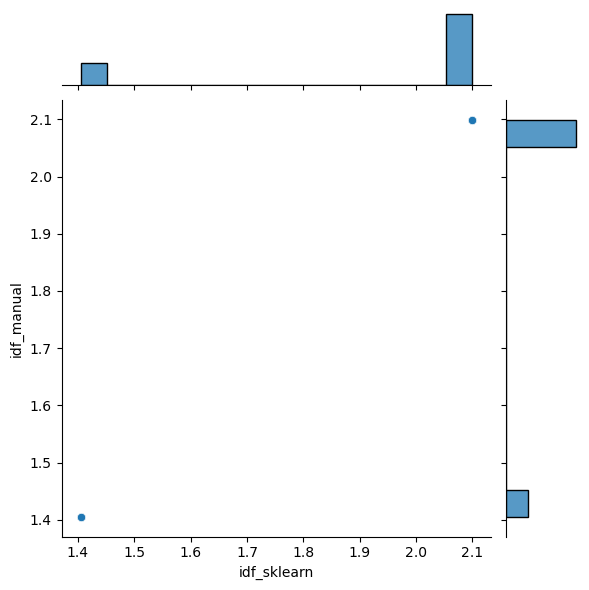

In [38]:
sns.jointplot(x=idf_sklearn, y=idf_plus1)

## Compute Overlap Score

I want to show that `CP001071.1` has unique k-mers compared to the rest of the documents

In [39]:
idf_smooth = np.log((1 + len(sample_names)) / (1 + document_frequency)) + 1
idf_smooth.name = "idf_smooth"
idf_smooth

10000031604968879    1.287682
10001967542883816    1.693147
10002844747369936    1.693147
10003635611094380    1.693147
10004355354687945    1.693147
                       ...   
9994065414699288     1.693147
9994394125866496     1.287682
9994816441327197     1.693147
9997181429474537     1.693147
9999648366321789     1.287682
Name: idf_smooth, Length: 10587, dtype: float64

In [40]:
idf_smooth.value_counts()

idf_smooth
1.693147    8058
1.287682    2529
Name: count, dtype: int64

### Use manually computed IDF

This shows that 

In [41]:
query_frequencies.value_counts()

CP001071.1  NC_009661.1  NC_011665.1
0.00000     0.000000     0.000191       2709
0.00037     0.000000     0.000000       2701
0.00000     0.000193     0.000000       2648
                         0.000191       2529
Name: count, dtype: int64

In [42]:
2709 + 2529

5238

In [43]:
query_counts.apply(lambda x: x.value_counts())

,CP001071.1,NC_009661.1,NC_011665.1
0,7886,5410,5349
1,2701,5177,5238


In [44]:
query_counts.value_counts()

CP001071.1  NC_009661.1  NC_011665.1
0           0            1              2709
1           0            0              2701
0           1            0              2648
                         1              2529
Name: count, dtype: int64

In [45]:
query_frequencies.apply(lambda x: (x * idf).sum())

CP001071.1     1.098612
NC_009661.1    0.760005
NC_011665.1    0.763948
dtype: float64

In [46]:
query_frequencies.apply(lambda x: (x * idf_plus1).sum())

CP001071.1     2.098612
NC_009661.1    1.760005
NC_011665.1    1.763948
dtype: float64

In [47]:
query_frequencies.apply(lambda x: (x * idf_smooth).sum())

CP001071.1     1.693147
NC_009661.1    1.495075
NC_011665.1    1.497381
dtype: float64

## Test different scikit-learn TF-IDF metrics for comparison

`track_abundance=False` makes L1 and L2 norms the same, since all abundance vectors are weighted by their unit length

In [48]:
kwargs = {
    "defaults_norm_l2_yes_smoothing": {},
    "norm_l2_no_smoothing": dict(norm="l2", smooth_idf=False),
    "norm_l1_yes_smoothing": dict(norm="l1"),
    # This is what I was originally using
    "norm_l1_no_smoothing_original": dict(norm="l1", smooth_idf=False),
    # Use binary counts -> track_abundance = False
    "norm_l2_yes_smoothing_binary": dict(norm="l2", binary=True),
}

for name, kw in kwargs.items():

    vectorizer = TfidfVectorizer(**kw)
    X = vectorizer.fit_transform(corpus)
    print(f"--- {name} ---")
    print(cosine_similarity(X, X))
    print(query_frequencies.apply(lambda x: (x * vectorizer.idf_).sum()))

--- defaults_norm_l2_yes_smoothing ---
[[1.         0.         0.        ]
 [0.         1.         0.35322766]
 [0.         0.35322766 1.        ]]
CP001071.1     1.693147
NC_009661.1    1.495075
NC_011665.1    1.497381
dtype: float64
--- norm_l2_no_smoothing ---
[[1.         0.         0.        ]
 [0.         1.         0.29750579]
 [0.         0.29750579 1.        ]]
CP001071.1     2.098612
NC_009661.1    1.760005
NC_011665.1    1.763948
dtype: float64
--- norm_l1_yes_smoothing ---
[[1.         0.         0.        ]
 [0.         1.         0.35322766]
 [0.         0.35322766 1.        ]]
CP001071.1     1.693147
NC_009661.1    1.495075
NC_011665.1    1.497381
dtype: float64
--- norm_l1_no_smoothing_original ---
[[1.         0.         0.        ]
 [0.         1.         0.29750579]
 [0.         0.29750579 1.        ]]
CP001071.1     2.098612
NC_009661.1    1.760005
NC_011665.1    1.763948
dtype: float64
--- norm_l2_yes_smoothing_binary ---
[[1.         0.         0.        ]
 [0.   

## Compute the dot product between IDF for all hashvals and the per query frequencies

### Compute IDF for each sample, i.e. only the hashes that have some value

In [82]:
idf_smooth_per_sample = query_frequencies[query_frequencies == 0].copy()
idf_smooth_per_sample = idf_smooth_per_sample.apply(lambda x: x.fillna(idf_smooth))
idf_smooth_per_sample

match,CP001071.1,NC_009661.1,NC_011665.1
10000031604968879,0.000000,1.287682,1.287682
10001967542883816,0.000000,0.000000,1.693147
10002844747369936,0.000000,1.693147,0.000000
10003635611094380,1.693147,0.000000,0.000000
10004355354687945,0.000000,0.000000,1.693147
...,...,...,...
9994065414699288,0.000000,0.000000,1.693147
9994394125866496,0.000000,1.287682,1.287682
9994816441327197,1.693147,0.000000,0.000000
9997181429474537,0.000000,0.000000,1.693147


### Compute tf-idf scores as a dot product of idf per sample and query frequencies

In [90]:
tf_idf_scores = query_frequencies.T.dot(idf_smooth_per_sample)
tf_idf_scores.index.name = "query"
tf_idf_scores.columns.name = "match"
tf_idf_scores.name = "tf_idf_score"
tf_idf_scores

match,CP001071.1,NC_009661.1,NC_011665.1
query,,,
CP001071.1,1.693147,0.000000,0.000000
NC_009661.1,0.000000,1.495075,0.629042
NC_011665.1,0.000000,0.621716,1.497381


In [92]:
tf_idf_scores.stack().reset_index().sort_values(["query", "match"])

,query,match,0
0,CP001071.1,CP001071.1,1.693147
1,CP001071.1,NC_009661.1,0.000000
2,CP001071.1,NC_011665.1,0.000000
3,NC_009661.1,CP001071.1,0.000000
4,NC_009661.1,NC_009661.1,1.495075
5,NC_009661.1,NC_011665.1,0.629042
6,NC_011665.1,CP001071.1,0.000000
7,NC_011665.1,NC_009661.1,0.621716
8,NC_011665.1,NC_011665.1,1.497381


In [93]:
round?

Signature: round(number, ndigits=None)
Docstring:
Round a number to a given precision in decimal digits.

The return value is an integer if ndigits is omitted or None.  Otherwise
the return value has the same type as the number.  ndigits may be negative.
Type:      builtin_function_or_method

# Use SNAP25 protein data

In [51]:
sigfile = f"{testdata}/snap25.protein.k5.sig"


def make_hashval_series(sig):
    hashes = pd.Series(
        sig.minhash.get_mins(with_abundance=True), name=sig.name.split()[0]
    )
    return hashes


sigs = list(
    sourmash.load_file_as_signatures(sigfile, select_moltype="protein", ksize=5)
)

hashval_seriess = [make_hashval_series(sig) for sig in sigs]
len(hashval_seriess)
hashval_seriess[0]

/tmp/ipykernel_7464/403141695.py:6: DeprecatedWarning: get_mins is deprecated as of 3.5 and will be removed in 5.0. Use .hashes property instead.
  sig.minhash.get_mins(with_abundance=True), name=sig.name.split()[0]


79346193818611200       1
168240307515063181      1
357295714612793700      1
641852037324162118      1
757825252518801166      1
                       ..
17970119671529042692    1
17974861901755320079    1
18052376351337125503    1
18054317455131746015    1
18150884563146655585    1
Name: sp|P60880|SNP25_HUMAN, Length: 202, dtype: int64

In [52]:
%%time

snap25_hashvals = pd.concat(hashval_seriess, axis=1).fillna(0)
print(snap25_hashvals.shape)
snap25_hashvals.head()

(233, 4)
CPU times: user 1.66 ms, sys: 0 ns, total: 1.66 ms
Wall time: 2.31 ms


,sp|P60880|SNP25_HUMAN,sp|P60880-2|SNP25_HUMAN,snap25a_mxe_exon_human,snap25b_mxe_exon_human
79346193818611200,1.0,1.0,1.0,1.0
168240307515063181,1.0,1.0,0.0,0.0
357295714612793700,1.0,1.0,0.0,0.0
641852037324162118,1.0,1.0,0.0,0.0
757825252518801166,1.0,1.0,0.0,0.0


In [53]:
snap25_n_hashvals_per_sample = snap25_hashvals.sum()
snap25_n_hashvals_per_sample

sp|P60880|SNP25_HUMAN      202.0
sp|P60880-2|SNP25_HUMAN    202.0
snap25a_mxe_exon_human      28.0
snap25b_mxe_exon_human      28.0
dtype: float64

In [54]:
snap25_freqs = snap25_hashvals / snap25_hashvals.sum()
snap25_freqs

,sp|P60880|SNP25_HUMAN,sp|P60880-2|SNP25_HUMAN,snap25a_mxe_exon_human,snap25b_mxe_exon_human
79346193818611200,0.00495,0.00495,0.035714,0.035714
168240307515063181,0.00495,0.00495,0.000000,0.000000
357295714612793700,0.00495,0.00495,0.000000,0.000000
641852037324162118,0.00495,0.00495,0.000000,0.000000
757825252518801166,0.00495,0.00495,0.000000,0.000000
...,...,...,...,...
15743546848986775135,0.00000,0.00495,0.000000,0.000000
15861183366162130000,0.00000,0.00495,0.000000,0.000000
16118309445659596513,0.00000,0.00495,0.000000,0.000000
18008872121808310705,0.00000,0.00495,0.035714,0.000000


In [55]:
snap25_freqs.value_counts()

sp|P60880|SNP25_HUMAN  sp|P60880-2|SNP25_HUMAN  snap25a_mxe_exon_human  snap25b_mxe_exon_human
0.00495                0.00495                  0.000000                0.000000                  166
0.00000                0.00495                  0.035714                0.000000                   23
0.00495                0.00000                  0.000000                0.035714                   23
0.00000                0.00495                  0.000000                0.000000                    8
0.00495                0.00000                  0.000000                0.000000                    8
                       0.00495                  0.035714                0.035714                    5
Name: count, dtype: int64

In [56]:
snap25_db_counts = snap25_hashvals.sum(axis=1)
snap25_db_counts.value_counts()

2.0    212
1.0     16
4.0      5
Name: count, dtype: int64

In [57]:
len(snap25_db_counts)

233

### Compute L1 norm for database frequencies

In [58]:
snap25_db_l1_norm_abund = snap25_db_counts.sum()
snap25_db_l1_norm_abund

np.float64(460.0)

In [59]:
snap25_db_l1_norm = snap25_db_counts / snap25_db_l1_norm_abund
snap25_db_l1_norm.value_counts()

0.004348    212
0.002174     16
0.008696      5
Name: count, dtype: int64

### Compute L2 norm for database frequencies

In [60]:
snap25_db_l2_norm_abund = (snap25_db_counts.pow(2)).sum()
snap25_db_l2_norm_abund

np.float64(944.0)

In [61]:
snap25_db_l2_norm = snap25_db_counts / snap25_db_l2_norm_abund
snap25_db_l2_norm.value_counts()

0.002119    212
0.001059     16
0.004237      5
Name: count, dtype: int64

## Compute document frequency (df) for snap25

In [62]:
snap25_document_frequency = snap25_hashvals[snap25_hashvals > 0].sum(axis=1)
snap25_document_frequency.value_counts()

2.0    212
1.0     16
4.0      5
Name: count, dtype: int64

In [63]:
snap25_idf_smooth = (
    np.log((1 + len(snap25_freqs.columns)) / (1 + snap25_document_frequency)) + 1
)
snap25_idf_smooth.name = "snap25_idf_smooth"
snap25_idf_smooth.value_counts()

snap25_idf_smooth
1.510826    212
1.916291     16
1.000000      5
Name: count, dtype: int64

## Compute tf-idf scores

In [64]:
snap25_freqs

,sp|P60880|SNP25_HUMAN,sp|P60880-2|SNP25_HUMAN,snap25a_mxe_exon_human,snap25b_mxe_exon_human
79346193818611200,0.00495,0.00495,0.035714,0.035714
168240307515063181,0.00495,0.00495,0.000000,0.000000
357295714612793700,0.00495,0.00495,0.000000,0.000000
641852037324162118,0.00495,0.00495,0.000000,0.000000
757825252518801166,0.00495,0.00495,0.000000,0.000000
...,...,...,...,...
15743546848986775135,0.00000,0.00495,0.000000,0.000000
15861183366162130000,0.00000,0.00495,0.000000,0.000000
16118309445659596513,0.00000,0.00495,0.000000,0.000000
18008872121808310705,0.00000,0.00495,0.035714,0.000000


In [65]:
snap25_tf_idf = snap25_freqs.apply(lambda x: (x * snap25_idf_smooth))
snap25_tf_idf.value_counts()

sp|P60880|SNP25_HUMAN  sp|P60880-2|SNP25_HUMAN  snap25a_mxe_exon_human  snap25b_mxe_exon_human
0.007479               0.007479                 0.000000                0.000000                  166
0.000000               0.007479                 0.053958                0.000000                   23
0.007479               0.000000                 0.000000                0.053958                   23
0.000000               0.009487                 0.000000                0.000000                    8
0.009487               0.000000                 0.000000                0.000000                    8
0.004950               0.004950                 0.035714                0.035714                    5
Name: count, dtype: int64

In [66]:
snap25_tf_idf_value_counts = snap25_tf_idf.value_counts()
snap25_tf_idf_value_counts

sp|P60880|SNP25_HUMAN  sp|P60880-2|SNP25_HUMAN  snap25a_mxe_exon_human  snap25b_mxe_exon_human
0.007479               0.007479                 0.000000                0.000000                  166
0.000000               0.007479                 0.053958                0.000000                   23
0.007479               0.000000                 0.000000                0.053958                   23
0.000000               0.009487                 0.000000                0.000000                    8
0.009487               0.000000                 0.000000                0.000000                    8
0.004950               0.004950                 0.035714                0.035714                    5
Name: count, dtype: int64

In [67]:
snap25_tf_idf_value_counts.unstack()

snap25b_mxe_exon_human                                                0.000000  \
sp|P60880|SNP25_HUMAN sp|P60880-2|SNP25_HUMAN snap25a_mxe_exon_human             
0.000000              0.007479                0.053958                    23.0   
                      0.009487                0.000000                     8.0   
0.004950              0.004950                0.035714                     NaN   
0.007479              0.000000                0.000000                     NaN   
                      0.007479                0.000000                   166.0   
0.009487              0.000000                0.000000                     8.0   

snap25b_mxe_exon_human                                                0.035714  \
sp|P60880|SNP25_HUMAN sp|P60880-2|SNP25_HUMAN snap25a_mxe_exon_human             
0.000000              0.007479                0.053958                     NaN   
                      0.009487                0.000000                     NaN   
0.004950              0.004950                0.035714                     5.0   
0.007479              0.000000                0.000000                     NaN   
                      0.007479                0.000000                     NaN   
0.009487              0.000000                0.000000                     NaN   

snap25b_mxe_exon_human                                                0.053958  
sp|P60880|SNP25_HUMAN sp|P60880-2|SNP25_HUMAN snap25a_mxe_exon_human            
0.000000              0.007479                0.053958                     NaN  
                      0.009487                0.000000                     NaN  
0.004950              0.004950                0.035714                     NaN  
0.007479              0.000000                0.000000                    23.0  
                      0.007479                0.000000                     NaN  
0.009487              0.000000                0.000000                     NaN

In [68]:
snap25_tf_idf_scores = snap25_tf_idf.sum()
snap25_tf_idf_scores

sp|P60880|SNP25_HUMAN      1.514239
sp|P60880-2|SNP25_HUMAN    1.514239
snap25a_mxe_exon_human     1.419607
snap25b_mxe_exon_human     1.419607
dtype: float64

In [69]:
snap25_idf_smooth

79346193818611200       1.000000
168240307515063181      1.510826
357295714612793700      1.510826
641852037324162118      1.510826
757825252518801166      1.510826
                          ...   
15743546848986775135    1.916291
15861183366162130000    1.916291
16118309445659596513    1.916291
18008872121808310705    1.510826
18170310193389148668    1.510826
Name: snap25_idf_smooth, Length: 233, dtype: float64

### Compute IDF for each sample, i.e. only the hashes that have some value

In [70]:
snap25_idf_per_sample = snap25_freqs[snap25_freqs == 0]
snap25_idf_per_sample = snap25_idf_per_sample.apply(
    lambda x: x.fillna(snap25_idf_smooth)
)
snap25_idf_per_sample

,sp|P60880|SNP25_HUMAN,sp|P60880-2|SNP25_HUMAN,snap25a_mxe_exon_human,snap25b_mxe_exon_human
79346193818611200,1.000000,1.000000,1.000000,1.0
168240307515063181,1.510826,1.510826,0.000000,0.0
357295714612793700,1.510826,1.510826,0.000000,0.0
641852037324162118,1.510826,1.510826,0.000000,0.0
757825252518801166,1.510826,1.510826,0.000000,0.0
...,...,...,...,...
15743546848986775135,0.000000,1.916291,0.000000,0.0
15861183366162130000,0.000000,1.916291,0.000000,0.0
16118309445659596513,0.000000,1.916291,0.000000,0.0
18008872121808310705,0.000000,1.510826,1.510826,0.0


### Take the dot product of snap25 frequencies times the idf per samples, to get the tf-idf score for each comparison

In [71]:
snap25_tf_idf_scores = snap25_freqs.T.dot(snap25_idf_per_sample)
# snap25_tf_idf_scores.index.name = None
# snap25_tf_idf_scores.columns.name = 'match'
snap25_tf_idf_scores.name = "tf_idf_score"
snap25_tf_idf_scores

,sp|P60880|SNP25_HUMAN,sp|P60880-2|SNP25_HUMAN,snap25a_mxe_exon_human,snap25b_mxe_exon_human
sp|P60880|SNP25_HUMAN,1.514239,1.266322,0.024752,0.196777
sp|P60880-2|SNP25_HUMAN,1.266322,1.514239,0.196777,0.024752
snap25a_mxe_exon_human,0.178571,1.419607,1.419607,0.178571
snap25b_mxe_exon_human,1.419607,0.178571,0.178571,1.419607


In [72]:
snap25_tf_idf_scores.stack().reset_index().sort_values(["level_0", "level_1"])

,level_0,level_1,0
10,snap25a_mxe_exon_human,snap25a_mxe_exon_human,1.419607
11,snap25a_mxe_exon_human,snap25b_mxe_exon_human,0.178571
9,snap25a_mxe_exon_human,sp|P60880-2|SNP25_HUMAN,1.419607
8,snap25a_mxe_exon_human,sp|P60880|SNP25_HUMAN,0.178571
14,snap25b_mxe_exon_human,snap25a_mxe_exon_human,0.178571
15,snap25b_mxe_exon_human,snap25b_mxe_exon_human,1.419607
13,snap25b_mxe_exon_human,sp|P60880-2|SNP25_HUMAN,0.178571
12,snap25b_mxe_exon_human,sp|P60880|SNP25_HUMAN,1.419607
6,sp|P60880-2|SNP25_HUMAN,snap25a_mxe_exon_human,0.196777
7,sp|P60880-2|SNP25_HUMAN,snap25b_mxe_exon_human,0.024752
